## 1. Import Libraries và Load Data (Autoencoder Predictions Only)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load data
file_path = r'/kaggle/input/all-paths-predictions/all_paths_predictions_with_langgraph_dec6_merged.csv'
df_full = pd.read_csv(file_path)

# Filter for autoencoder predictions only
df = df_full[df_full['from'] == 'autoencoder prediction'].copy()

print(f"Full dataset loaded: {df_full.shape}")
print(f"Filtered for autoencoder predictions: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Full dataset loaded: (15217, 13)
Filtered for autoencoder predictions: (5217, 13)
Columns: ['Unnamed: 0', 'seed', 'label_true', 'label_pred', 'node_0', 'node_1', 'node_2', 'embedding', 'from', 'final_pred', 'llm_reasoning', 'threshold', 'score']


## 2. Data Overview và Basic Statistics (Autoencoder Only)

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,seed,label_true,label_pred,node_0,node_1,node_2,embedding,from,final_pred,llm_reasoning,threshold,score
10000,10000,5,0,0,12,614,12,"(np.float64(0.5093977377374577), np.float64(0....",autoencoder prediction,0,NaN,0.311547,0.158035
10001,10001,5,0,1,4997,6998,4997,"(np.float64(-0.19393244224458192), np.float64(...",autoencoder prediction,0,The authentication path C4997 -> U6998 -> C499...,0.311547,0.347413
10002,10002,5,0,0,6920,5110,6920,"(np.float64(0.02166532386084845), np.float64(0...",autoencoder prediction,0,NaN,0.311547,0.060729
10003,10003,5,0,0,12470,8666,8,"(np.float64(0.1500593853443477), np.float64(0....",autoencoder prediction,0,NaN,0.311547,0.126553
10004,10004,5,0,0,10,8312,10,"(np.float64(-0.29252440306558153), np.float64(...",autoencoder prediction,0,NaN,0.311547,0.147129


In [4]:
# Data info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5217 entries, 10000 to 15216
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5217 non-null   int64  
 1   seed           5217 non-null   int64  
 2   label_true     5217 non-null   int64  
 3   label_pred     5217 non-null   int64  
 4   node_0         5217 non-null   int64  
 5   node_1         5217 non-null   int64  
 6   node_2         5217 non-null   int64  
 7   embedding      5217 non-null   object 
 8   from           5217 non-null   object 
 9   final_pred     5217 non-null   int64  
 10  llm_reasoning  571 non-null    object 
 11  threshold      5217 non-null   float64
 12  score          5217 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 570.6+ KB


In [5]:
# Basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Unnamed: 0,seed,label_true,label_pred,node_0,node_1,node_2,final_pred,threshold,score
count,5217.000000,5217.0,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5.217000e+03,5217.000000
mean,12608.000000,5.0,0.041595,0.109450,4954.107533,4229.337359,1417.415181,0.082039,3.115474e-01,0.167537
std,1506.162508,0.0,0.199681,0.312233,4359.537312,3306.493557,3048.818732,0.274451,1.537806e-14,0.121153
min,10000.000000,5.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.115474e-01,0.012186
25%,11304.000000,5.0,0.000000,0.000000,566.000000,1164.000000,12.000000,0.000000,3.115474e-01,0.093833
50%,12608.000000,5.0,0.000000,0.000000,4488.000000,3831.000000,85.000000,0.000000,3.115474e-01,0.139776
75%,13912.000000,5.0,0.000000,0.000000,8388.000000,6903.000000,628.000000,0.000000,3.115474e-01,0.187973
max,15216.000000,5.0,1.000000,1.000000,15423.000000,11580.000000,15384.000000,1.000000,3.115474e-01,0.934913


In [6]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found!")


Missing Values:
llm_reasoning    4646
dtype: int64


In [7]:
# Check unique values
print("\nUnique values in key columns:")
print(f"Seeds: {df['seed'].nunique()}")
print(f"Label true: {df['label_true'].unique()}")
print(f"Label pred: {df['label_pred'].unique()}")
print(f"Final pred: {df['final_pred'].unique()}")
print(f"From: {df['from'].unique()}")


Unique values in key columns:
Seeds: 1
Label true: [0 1]
Label pred: [0 1]
Final pred: [0 1]
From: ['autoencoder prediction']


In [8]:
# Check threshold and score columns
if 'threshold' in df.columns and 'score' in df.columns:
    print("\nThreshold and Score Analysis:")
    print(f"Threshold - Mean: {df['threshold'].mean():.4f}, Std: {df['threshold'].std():.4f}")
    print(f"Score - Mean: {df['score'].mean():.4f}, Std: {df['score'].std():.4f}")
    print(f"Samples with threshold: {df['threshold'].notna().sum()} ({df['threshold'].notna().sum()/len(df)*100:.2f}%)")
    print(f"Samples with score: {df['score'].notna().sum()} ({df['score'].notna().sum()/len(df)*100:.2f}%)")
else:
    print("\nNote: 'threshold' or 'score' columns not found in dataset")


Threshold and Score Analysis:
Threshold - Mean: 0.3115, Std: 0.0000
Score - Mean: 0.1675, Std: 0.1212
Samples with threshold: 5217 (100.00%)
Samples with score: 5217 (100.00%)


## 3. Label Distribution Analysis (Autoencoder Only)

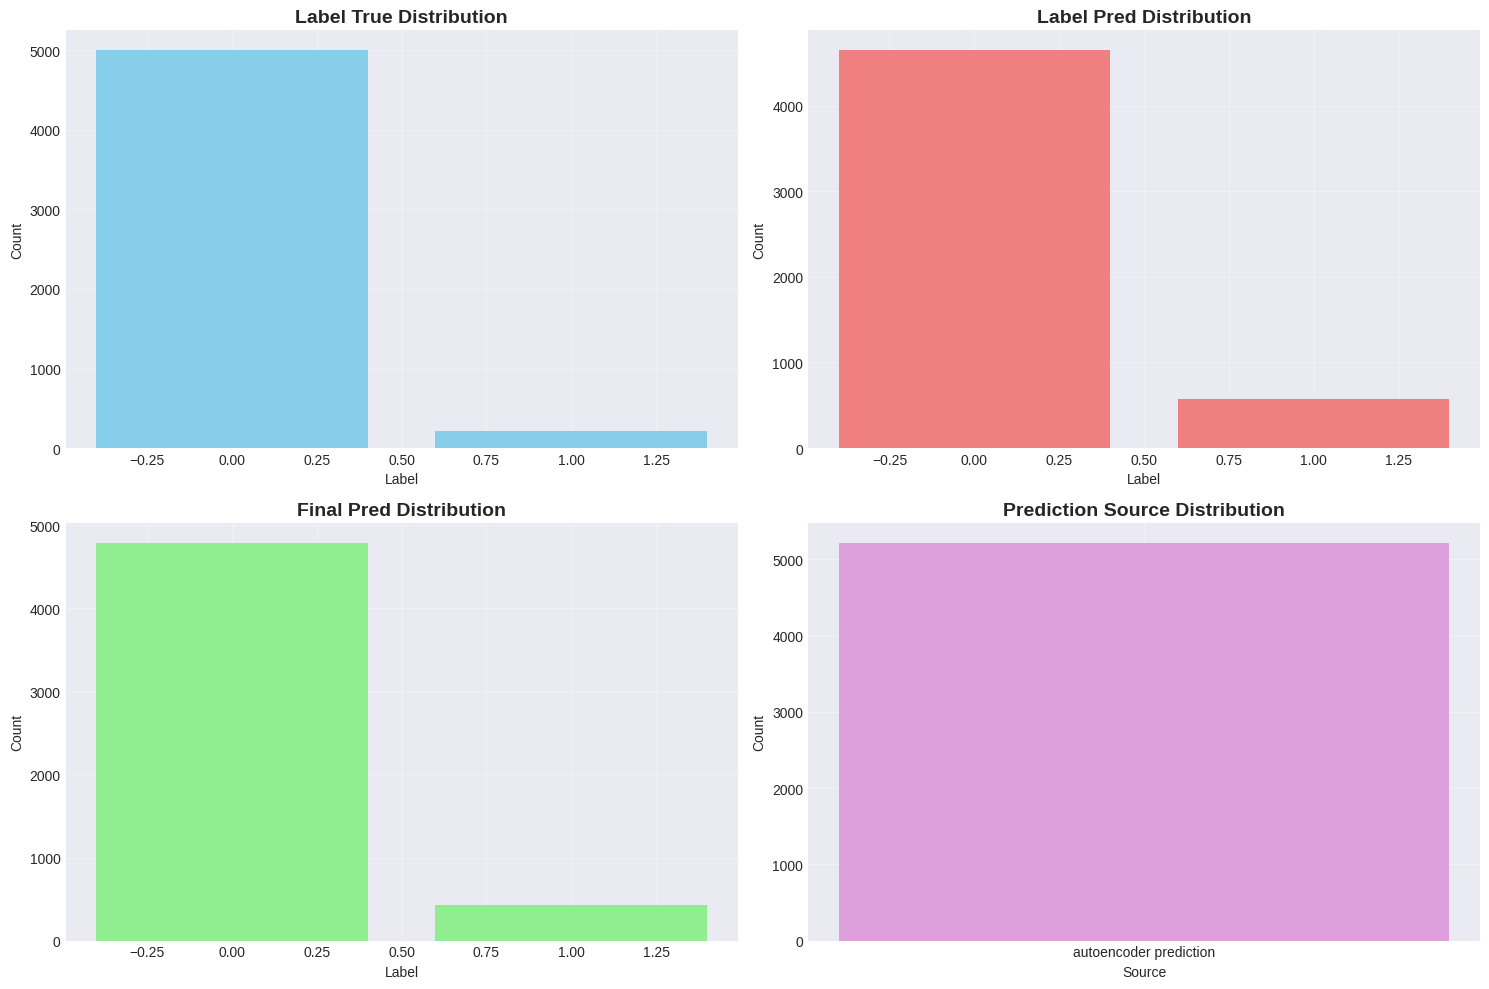


Label True:
label_true
0    5000
1     217
Name: count, dtype: int64

Label True (%):
label_true
0    95.840521
1     4.159479
Name: proportion, dtype: float64


In [9]:
# Label distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Label True distribution
label_true_counts = df['label_true'].value_counts()
axes[0, 0].bar(label_true_counts.index, label_true_counts.values, color='skyblue')
axes[0, 0].set_title('Label True Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Label')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3)

# Label Pred distribution
label_pred_counts = df['label_pred'].value_counts()
axes[0, 1].bar(label_pred_counts.index, label_pred_counts.values, color='lightcoral')
axes[0, 1].set_title('Label Pred Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Label')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(alpha=0.3)

# Final Pred distribution
final_pred_counts = df['final_pred'].value_counts()
axes[1, 0].bar(final_pred_counts.index, final_pred_counts.values, color='lightgreen')
axes[1, 0].set_title('Final Pred Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(alpha=0.3)

# Source distribution
from_counts = df['from'].value_counts()
axes[1, 1].bar(from_counts.index, from_counts.values, color='plum')
axes[1, 1].set_title('Prediction Source Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Source')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nLabel True:")
print(label_true_counts)
print(f"\nLabel True (%):\n{df['label_true'].value_counts(normalize=True)*100}")

## 4. Model Performance Evaluation (Autoencoder Only)

In [10]:
# Performance metrics for label_pred
print("=" * 60)
print("PERFORMANCE METRICS - Label Pred vs Label True")
print("=" * 60)

accuracy_pred = accuracy_score(df['label_true'], df['label_pred'])
precision_pred = precision_score(df['label_true'], df['label_pred'], average='weighted', zero_division=0)
recall_pred = recall_score(df['label_true'], df['label_pred'], average='weighted', zero_division=0)
f1_pred = f1_score(df['label_true'], df['label_pred'], average='weighted', zero_division=0)

# Calculate AUC using score (continuous values)
try:
    if 'score' in df.columns and df['score'].notna().sum() > 0:
        auc_pred = roc_auc_score(df['label_true'], df['score'])
        print(f"\nUsing 'score' column for AUC calculation")
    else:
        auc_pred = roc_auc_score(df['label_true'], df['label_pred'])
        print(f"\nUsing 'label_pred' for AUC calculation (no score available)")
except:
    auc_pred = None

print(f"\nAccuracy:  {accuracy_pred:.4f} ({accuracy_pred*100:.2f}%)")
print(f"Precision: {precision_pred:.4f}")
print(f"Recall:    {recall_pred:.4f}")
print(f"F1 Score:  {f1_pred:.4f}")
if auc_pred is not None:
    print(f"AUC Score: {auc_pred:.4f}")

print("\n" + "=" * 60)
print("PERFORMANCE METRICS - Final Pred vs Label True")
print("=" * 60)

accuracy_final = accuracy_score(df['label_true'], df['final_pred'])
precision_final = precision_score(df['label_true'], df['final_pred'], average='weighted', zero_division=0)
recall_final = recall_score(df['label_true'], df['final_pred'], average='weighted', zero_division=0)
f1_final = f1_score(df['label_true'], df['final_pred'], average='weighted', zero_division=0)

# For final_pred, we still use score for AUC (same continuous prediction score)
try:
    if 'score' in df.columns and df['score'].notna().sum() > 0:
        auc_final = roc_auc_score(df['label_true'], df['score'])
    else:
        auc_final = roc_auc_score(df['label_true'], df['final_pred'])
except:
    auc_final = None

print(f"\nAccuracy:  {accuracy_final:.4f} ({accuracy_final*100:.2f}%)")
print(f"Precision: {precision_final:.4f}")
print(f"Recall:    {recall_final:.4f}")
print(f"F1 Score:  {f1_final:.4f}")
if auc_final is not None:
    print(f"AUC Score: {auc_final:.4f}")

print("\n" + "=" * 60)

PERFORMANCE METRICS - Label Pred vs Label True

Using 'score' column for AUC calculation

Accuracy:  0.9268 (92.68%)
Precision: 0.9703
Recall:    0.9268
F1 Score:  0.9419
AUC Score: 0.9609

PERFORMANCE METRICS - Final Pred vs Label True

Accuracy:  0.9538 (95.38%)
Precision: 0.9750
Recall:    0.9538
F1 Score:  0.9609
AUC Score: 0.9609



In [11]:
# Classification Report
print("\nDetailed Classification Report - Label Pred:")
print(classification_report(df['label_true'], df['label_pred'], zero_division=0))

print("\n" + "=" * 60)
print("\nDetailed Classification Report - Final Pred:")
print(classification_report(df['label_true'], df['final_pred'], zero_division=0))


Detailed Classification Report - Label Pred:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5000
           1       0.36      0.94      0.52       217

    accuracy                           0.93      5217
   macro avg       0.68      0.93      0.74      5217
weighted avg       0.97      0.93      0.94      5217



Detailed Classification Report - Final Pred:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      5000
           1       0.47      0.93      0.63       217

    accuracy                           0.95      5217
   macro avg       0.73      0.94      0.80      5217
weighted avg       0.98      0.95      0.96      5217



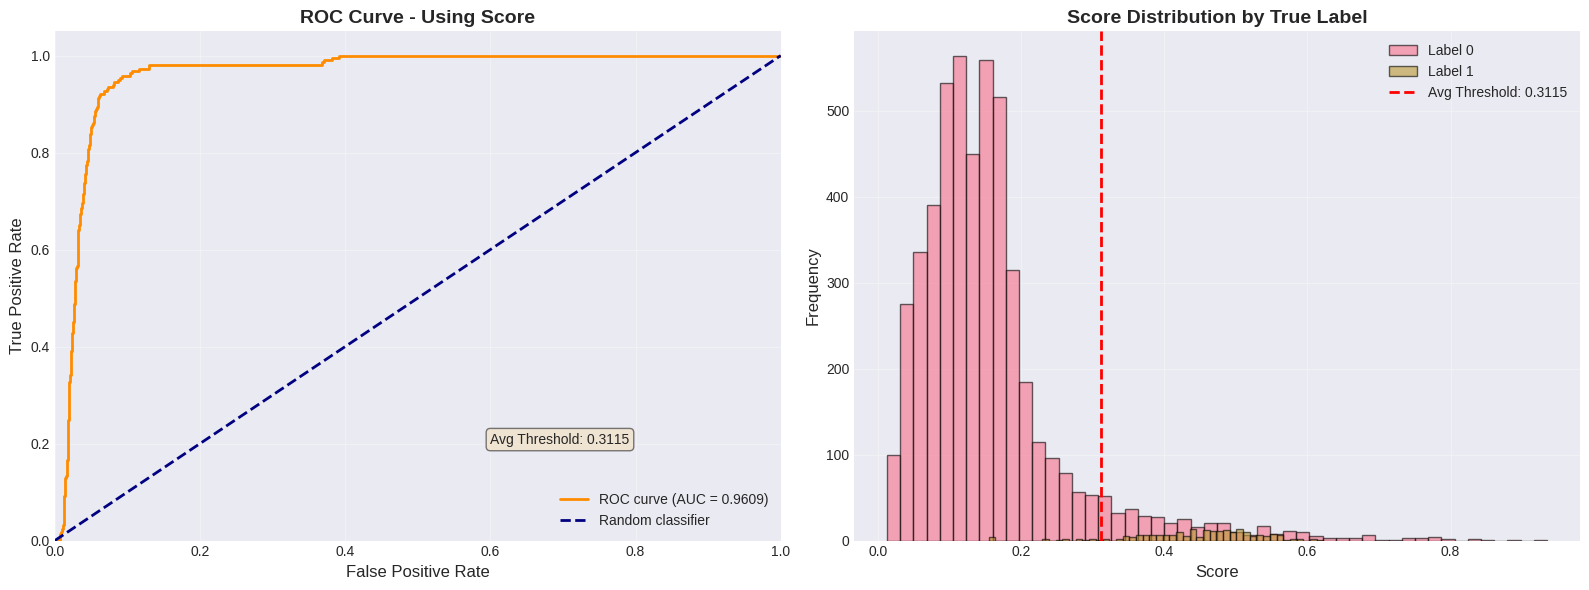


AUC Score: 0.9609

Threshold Statistics:
  - Mean: 0.3115
  - Std: 0.0000
  - Min: 0.3115
  - Max: 0.3115
  - Unique values: 1

Score Statistics:
  - Mean: 0.1675
  - Std: 0.1212
  - Min: 0.0122
  - Max: 0.9349


In [12]:
# ROC Curve visualization using score column
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC curve using score (continuous prediction values)
try:
    if 'score' in df.columns and df['score'].notna().sum() > 0:
        # Use score for ROC curve
        fpr_score, tpr_score, thresholds = roc_curve(df['label_true'], df['score'])
        roc_auc_score_val = roc_auc_score(df['label_true'], df['score'])
        
        axes[0].plot(fpr_score, tpr_score, color='darkorange', lw=2, 
                     label=f'ROC curve (AUC = {roc_auc_score_val:.4f})')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate', fontsize=12)
        axes[0].set_ylabel('True Positive Rate', fontsize=12)
        axes[0].set_title('ROC Curve - Using Score', fontsize=14, fontweight='bold')
        axes[0].legend(loc="lower right")
        axes[0].grid(alpha=0.3)
        
        # Add threshold information
        if 'threshold' in df.columns and df['threshold'].notna().sum() > 0:
            avg_threshold = df['threshold'].mean()
            axes[0].text(0.6, 0.2, f'Avg Threshold: {avg_threshold:.4f}', 
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        # Fallback to label_pred if score not available
        fpr_pred, tpr_pred, _ = roc_curve(df['label_true'], df['label_pred'])
        roc_auc_pred = roc_auc_score(df['label_true'], df['label_pred'])
        
        axes[0].plot(fpr_pred, tpr_pred, color='darkorange', lw=2, 
                     label=f'ROC curve (AUC = {roc_auc_pred:.4f})')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate', fontsize=12)
        axes[0].set_ylabel('True Positive Rate', fontsize=12)
        axes[0].set_title('ROC Curve - Label Pred', fontsize=14, fontweight='bold')
        axes[0].legend(loc="lower right")
        axes[0].grid(alpha=0.3)
except Exception as e:
    axes[0].text(0.5, 0.5, f'Cannot plot ROC curve\n{str(e)}', 
                 ha='center', va='center', transform=axes[0].transAxes)

# Score distribution by true label
try:
    if 'score' in df.columns and df['score'].notna().sum() > 0:
        # Plot score distribution
        for label in df['label_true'].unique():
            subset = df[df['label_true'] == label]['score']
            axes[1].hist(subset, bins=50, alpha=0.6, label=f'Label {label}', edgecolor='black')
        
        # Add threshold line if available
        if 'threshold' in df.columns and df['threshold'].notna().sum() > 0:
            avg_threshold = df['threshold'].mean()
            axes[1].axvline(x=avg_threshold, color='r', linestyle='--', linewidth=2, 
                           label=f'Avg Threshold: {avg_threshold:.4f}')
        
        axes[1].set_xlabel('Score', fontsize=12)
        axes[1].set_ylabel('Frequency', fontsize=12)
        axes[1].set_title('Score Distribution by True Label', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
    else:
        # Fallback: show final_pred ROC if score not available
        fpr_final, tpr_final, _ = roc_curve(df['label_true'], df['final_pred'])
        roc_auc_final = roc_auc_score(df['label_true'], df['final_pred'])
        
        axes[1].plot(fpr_final, tpr_final, color='green', lw=2, 
                     label=f'ROC curve (AUC = {roc_auc_final:.4f})')
        axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('False Positive Rate', fontsize=12)
        axes[1].set_ylabel('True Positive Rate', fontsize=12)
        axes[1].set_title('ROC Curve - Final Pred', fontsize=14, fontweight='bold')
        axes[1].legend(loc="lower right")
        axes[1].grid(alpha=0.3)
except Exception as e:
    axes[1].text(0.5, 0.5, f'Cannot plot distribution\n{str(e)}', 
                 ha='center', va='center', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()

# Print AUC and threshold statistics
if auc_pred is not None:
    print(f"\nAUC Score: {auc_pred:.4f}")
    
if 'threshold' in df.columns and df['threshold'].notna().sum() > 0:
    print(f"\nThreshold Statistics:")
    print(f"  - Mean: {df['threshold'].mean():.4f}")
    print(f"  - Std: {df['threshold'].std():.4f}")
    print(f"  - Min: {df['threshold'].min():.4f}")
    print(f"  - Max: {df['threshold'].max():.4f}")
    print(f"  - Unique values: {df['threshold'].nunique()}")
    
if 'score' in df.columns and df['score'].notna().sum() > 0:
    print(f"\nScore Statistics:")
    print(f"  - Mean: {df['score'].mean():.4f}")
    print(f"  - Std: {df['score'].std():.4f}")
    print(f"  - Min: {df['score'].min():.4f}")
    print(f"  - Max: {df['score'].max():.4f}")

### ROC Curve and Score Distribution Analysis

ROC curve được tính dựa trên cột `score` (giá trị liên tục) thay vì `label_pred` (nhị phân) để đánh giá chính xác khả năng phân loại của model. Biểu đồ thứ hai hiển thị phân phối điểm số theo nhãn thực tế và ngưỡng quyết định trung bình.

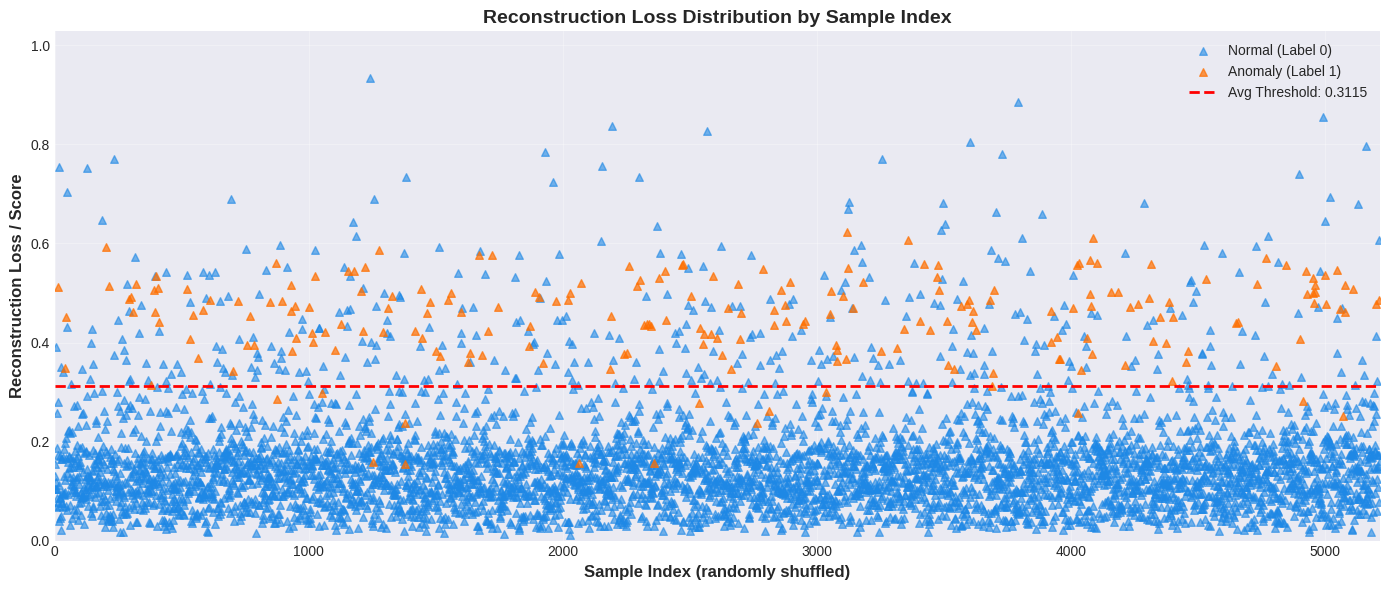


Score Distribution Statistics:
Normal samples (Label 0):
  - Count: 5000
  - Mean score: 0.1553
  - Std score: 0.1069
  - Max score: 0.9349

Anomaly samples (Label 1):
  - Count: 217
  - Mean score: 0.4484
  - Std score: 0.0861
  - Max score: 0.6222

Threshold Statistics:
  - Average threshold: 0.3115
  - Normal samples above threshold: 368 (7.36%)
  - Anomaly samples above threshold: 203 (93.55%)

Note: Data is randomly shuffled for visualization (random_state=42).
Normal and anomaly samples are mixed throughout the index range.


In [13]:
# Scatter plot of score/reconstruction loss by index
if 'score' in df.columns and df['score'].notna().sum() > 0:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Randomly shuffle the data for visualization
    df_sorted = df.sample(frac=1, random_state=42).reset_index(drop=True)
    normal_samples = df_sorted[df_sorted['label_true'] == 0]
    anomaly_samples = df_sorted[df_sorted['label_true'] == 1]
    
    # Plot normal samples (blue)
    ax.scatter(normal_samples.index, normal_samples['score'], 
              c='#1E88E5', alpha=0.6, s=30, label='Normal (Label 0)', marker='^')
    
    # Plot anomaly samples (orange)
    ax.scatter(anomaly_samples.index, anomaly_samples['score'], 
              c='#FF6F00', alpha=0.7, s=30, label='Anomaly (Label 1)', marker='^')
    
    # Add threshold line if available
    if 'threshold' in df.columns and df['threshold'].notna().sum() > 0:
        avg_threshold = df['threshold'].mean()
        ax.axhline(y=avg_threshold, color='red', linestyle='--', linewidth=2, 
                  label=f'Avg Threshold: {avg_threshold:.4f}')
    
    ax.set_xlabel('Sample Index (randomly shuffled)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Reconstruction Loss / Score', fontsize=12, fontweight='bold')
    ax.set_title('Reconstruction Loss Distribution by Sample Index', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', framealpha=0.9)
    ax.grid(alpha=0.3)
    
    # Set axis limits
    ax.set_xlim([0, len(df_sorted)])
    ax.set_ylim([0, df_sorted['score'].max() * 1.1])
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nScore Distribution Statistics:")
    print(f"Normal samples (Label 0):")
    print(f"  - Count: {len(normal_samples)}")
    print(f"  - Mean score: {normal_samples['score'].mean():.4f}")
    print(f"  - Std score: {normal_samples['score'].std():.4f}")
    print(f"  - Max score: {normal_samples['score'].max():.4f}")
    
    print(f"\nAnomaly samples (Label 1):")
    print(f"  - Count: {len(anomaly_samples)}")
    print(f"  - Mean score: {anomaly_samples['score'].mean():.4f}")
    print(f"  - Std score: {anomaly_samples['score'].std():.4f}")
    print(f"  - Max score: {anomaly_samples['score'].max():.4f}")
    
    if 'threshold' in df.columns and df['threshold'].notna().sum() > 0:
        avg_threshold = df['threshold'].mean()
        print(f"\nThreshold Statistics:")
        print(f"  - Average threshold: {avg_threshold:.4f}")
        print(f"  - Normal samples above threshold: {(normal_samples['score'] > avg_threshold).sum()} ({(normal_samples['score'] > avg_threshold).sum()/len(normal_samples)*100:.2f}%)")
        print(f"  - Anomaly samples above threshold: {(anomaly_samples['score'] > avg_threshold).sum()} ({(anomaly_samples['score'] > avg_threshold).sum()/len(anomaly_samples)*100:.2f}%)")
    
    print(f"\nNote: Data is randomly shuffled for visualization (random_state=42).")
    print(f"Normal and anomaly samples are mixed throughout the index range.")
else:
    print("Score column not available for scatter plot")

### Score Distribution Scatter Plot

Biểu đồ scatter plot hiển thị phân phối điểm số (score/reconstruction loss) theo index, với màu sắc phân biệt giữa nhãn thực tế.

## 5. Confusion Matrix Visualization (Autoencoder Only)

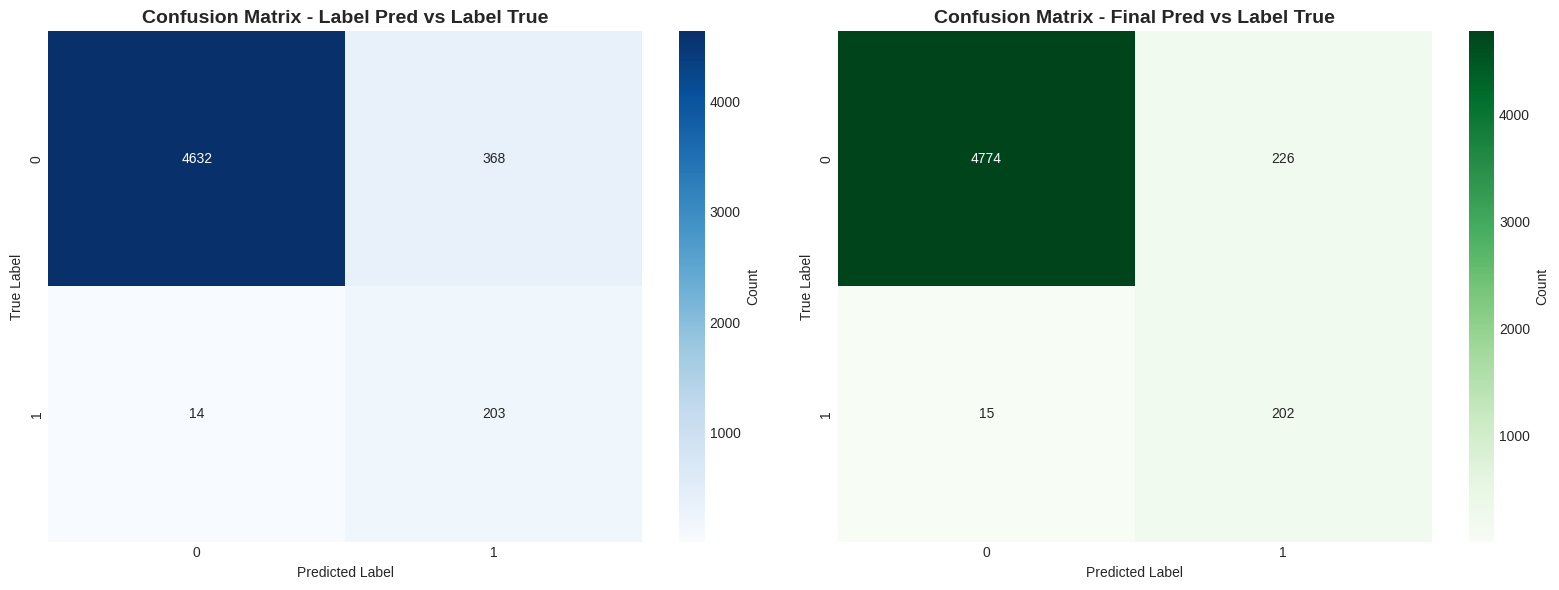


Confusion Matrix Analysis - Label Pred:
True Positives:  203
True Negatives:  4632
False Positives: 368
False Negatives: 14

Confusion Matrix Analysis - Final Pred:
True Positives:  202
True Negatives:  4774
False Positives: 226
False Negatives: 15


In [14]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix for label_pred
cm_pred = confusion_matrix(df['label_true'], df['label_pred'])
sns.heatmap(cm_pred, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Label Pred vs Label True', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion matrix for final_pred
cm_final = confusion_matrix(df['label_true'], df['final_pred'])
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Confusion Matrix - Final Pred vs Label True', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Calculate True Positives, False Positives, etc.
print("\nConfusion Matrix Analysis - Label Pred:")
tn_pred, fp_pred, fn_pred, tp_pred = cm_pred.ravel() if cm_pred.size == 4 else (0, 0, 0, 0)
print(f"True Positives:  {tp_pred}")
print(f"True Negatives:  {tn_pred}")
print(f"False Positives: {fp_pred}")
print(f"False Negatives: {fn_pred}")

print("\nConfusion Matrix Analysis - Final Pred:")
tn_final, fp_final, fn_final, tp_final = cm_final.ravel() if cm_final.size == 4 else (0, 0, 0, 0)
print(f"True Positives:  {tp_final}")
print(f"True Negatives:  {tn_final}")
print(f"False Positives: {fp_final}")
print(f"False Negatives: {fn_final}")

## 6. Comparison: Label Pred vs Final Pred (Autoencoder Only)

In [15]:
# Compare performance
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Label Pred': [accuracy_pred, precision_pred, recall_pred, f1_pred],
    'Final Pred': [accuracy_final, precision_final, recall_final, f1_final]
}

# Add AUC if available
if auc_pred is not None and auc_final is not None:
    metrics_data['Metric'].append('AUC')
    metrics_data['Label Pred'].append(auc_pred)
    metrics_data['Final Pred'].append(auc_final)

metrics_comparison = pd.DataFrame(metrics_data)

print("\nMetrics Comparison:")
print(metrics_comparison.to_string(index=False))

# Calculate improvement
metrics_comparison['Improvement'] = metrics_comparison['Final Pred'] - metrics_comparison['Label Pred']
metrics_comparison['Improvement (%)'] = (metrics_comparison['Improvement'] / metrics_comparison['Label Pred'] * 100).round(2)

print("\nImprovement from Label Pred to Final Pred:")
print(metrics_comparison[['Metric', 'Improvement', 'Improvement (%)']].to_string(index=False))


Metrics Comparison:
   Metric  Label Pred  Final Pred
 Accuracy    0.926778    0.953805
Precision    0.970305    0.975035
   Recall    0.926778    0.953805
 F1-Score    0.941881    0.960863
      AUC    0.960945    0.960945

Improvement from Label Pred to Final Pred:
   Metric  Improvement  Improvement (%)
 Accuracy     0.027027             2.92
Precision     0.004730             0.49
   Recall     0.027027             2.92
 F1-Score     0.018982             2.02
      AUC     0.000000             0.00


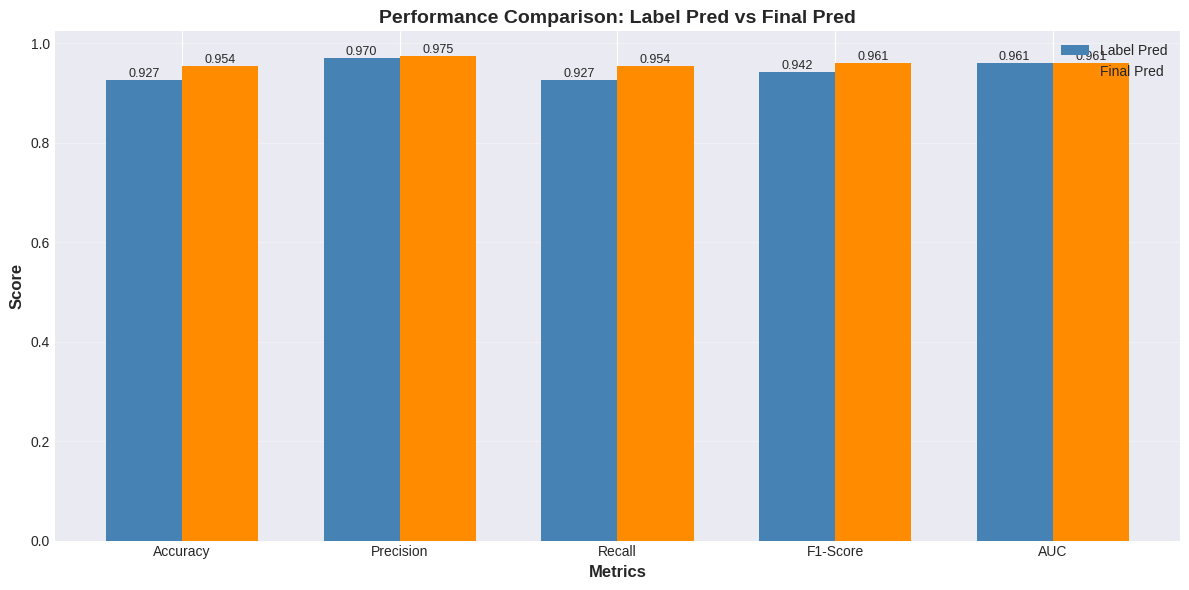

In [16]:
# Visualization of metrics comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics_comparison['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, metrics_comparison['Label Pred'], width, label='Label Pred', color='steelblue')
bars2 = ax.bar(x + width/2, metrics_comparison['Final Pred'], width, label='Final Pred', color='darkorange')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Performance Comparison: Label Pred vs Final Pred', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison['Metric'])
ax.legend()
ax.grid(alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 7. Source Verification (Should be 100% Autoencoder)

In [17]:
# Verify all data is from autoencoder
print("\nSource Distribution (should be 100% autoencoder):")
for source in df['from'].unique():
    subset = df[df['from'] == source]
    acc = accuracy_score(subset['label_true'], subset['final_pred'])
    print(f"{source}: {acc:.4f} ({acc*100:.2f}%) - {len(subset)} samples ({len(subset)/len(df)*100:.2f}%)")


Source Distribution (should be 100% autoencoder):
autoencoder prediction: 0.9538 (95.38%) - 5217 samples (100.00%)


In [18]:
# Crosstab analysis (should show only autoencoder)
print("\nCrosstab: Source vs Label True:")
crosstab_source_true = pd.crosstab(df['from'], df['label_true'], margins=True)
print(crosstab_source_true)

print("\nCrosstab: Source vs Final Pred:")
crosstab_source_pred = pd.crosstab(df['from'], df['final_pred'], margins=True)
print(crosstab_source_pred)


Crosstab: Source vs Label True:
label_true                 0    1   All
from                                   
autoencoder prediction  5000  217  5217
All                     5000  217  5217

Crosstab: Source vs Final Pred:
final_pred                 0    1   All
from                                   
autoencoder prediction  4789  428  5217
All                     4789  428  5217


## 8. Node Analysis (node_0, node_1, node_2) - Autoencoder Only

In [19]:
# Node statistics
print("\nNode Statistics:")
for col in ['node_0', 'node_1', 'node_2']:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")


Node Statistics:

node_0:
  Unique values: 2650
  Min: 1
  Max: 15423
  Mean: 4954.11
  Median: 4488.00

node_1:
  Unique values: 3261
  Min: 0
  Max: 11580
  Mean: 4229.34
  Median: 3831.00

node_2:
  Unique values: 910
  Min: 1
  Max: 15384
  Mean: 1417.42
  Median: 85.00


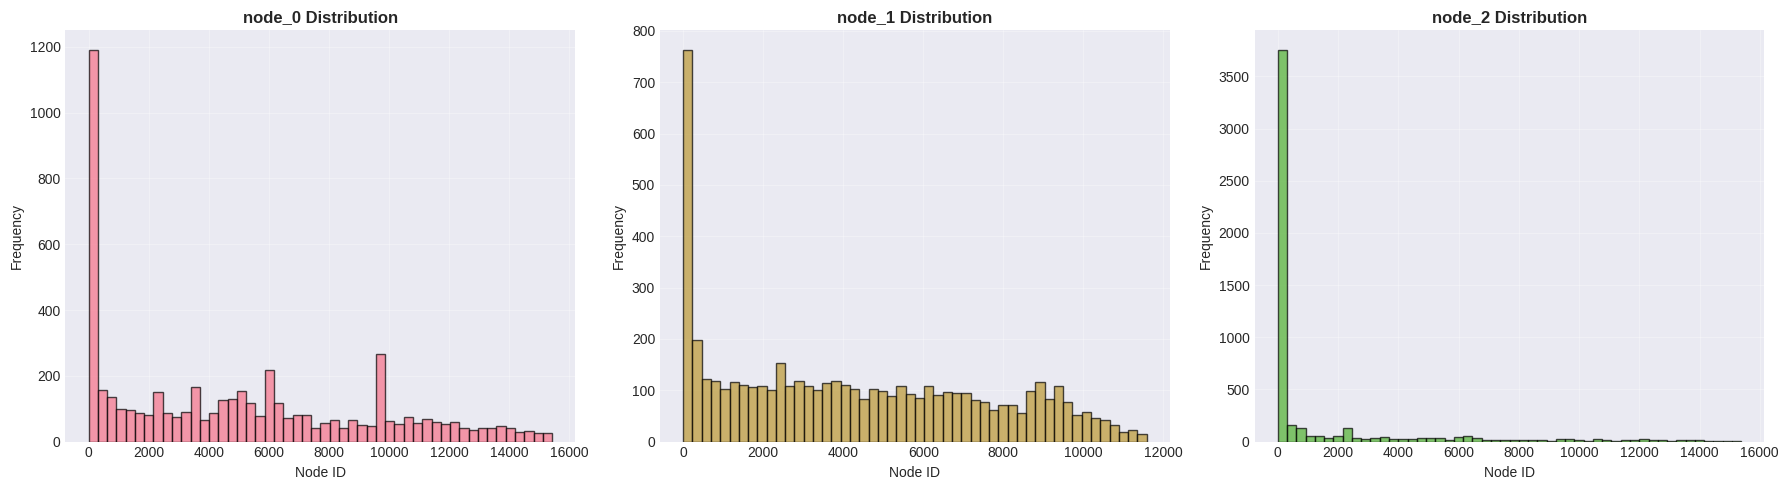

In [20]:
# Node distribution visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(['node_0', 'node_1', 'node_2']):
    axes[idx].hist(df[col], bins=50, color=f'C{idx}', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Node ID')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Seed Analysis (Autoencoder Only)

In [21]:
# Performance by seed
print("\nPerformance by Seed:")

def calc_metrics_per_seed(x):
    metrics = {
        'Count': len(x),
        'Accuracy': accuracy_score(x['label_true'], x['final_pred']),
        'Precision': precision_score(x['label_true'], x['final_pred'], average='weighted', zero_division=0),
        'Recall': recall_score(x['label_true'], x['final_pred'], average='weighted', zero_division=0),
        'F1': f1_score(x['label_true'], x['final_pred'], average='weighted', zero_division=0)
    }
    # Add AUC using score if possible
    try:
        if 'score' in x.columns and x['score'].notna().sum() > 0:
            metrics['AUC'] = roc_auc_score(x['label_true'], x['score'])
        else:
            metrics['AUC'] = roc_auc_score(x['label_true'], x['final_pred'])
    except:
        metrics['AUC'] = None
    
    # Add threshold statistics if available
    if 'threshold' in x.columns and x['threshold'].notna().sum() > 0:
        metrics['Avg_Threshold'] = x['threshold'].mean()
    else:
        metrics['Avg_Threshold'] = None
        
    return pd.Series(metrics)

seed_performance = df.groupby('seed').apply(calc_metrics_per_seed).reset_index()

print(seed_performance.to_string(index=False))

print(f"\nAverage Accuracy across seeds: {seed_performance['Accuracy'].mean():.4f}")
print(f"Std Accuracy across seeds: {seed_performance['Accuracy'].std():.4f}")

if seed_performance['AUC'].notna().any():
    print(f"Average AUC across seeds: {seed_performance['AUC'].mean():.4f}")
    print(f"Std AUC across seeds: {seed_performance['AUC'].std():.4f}")
    
if 'Avg_Threshold' in seed_performance.columns and seed_performance['Avg_Threshold'].notna().any():
    print(f"Average Threshold across seeds: {seed_performance['Avg_Threshold'].mean():.4f}")
    print(f"Std Threshold across seeds: {seed_performance['Avg_Threshold'].std():.4f}")


Performance by Seed:
 seed  Count  Accuracy  Precision   Recall       F1      AUC  Avg_Threshold
    5 5217.0  0.953805   0.975035 0.953805 0.960863 0.960945       0.311547

Average Accuracy across seeds: 0.9538
Std Accuracy across seeds: nan
Average AUC across seeds: 0.9609
Std AUC across seeds: nan
Average Threshold across seeds: 0.3115
Std Threshold across seeds: nan


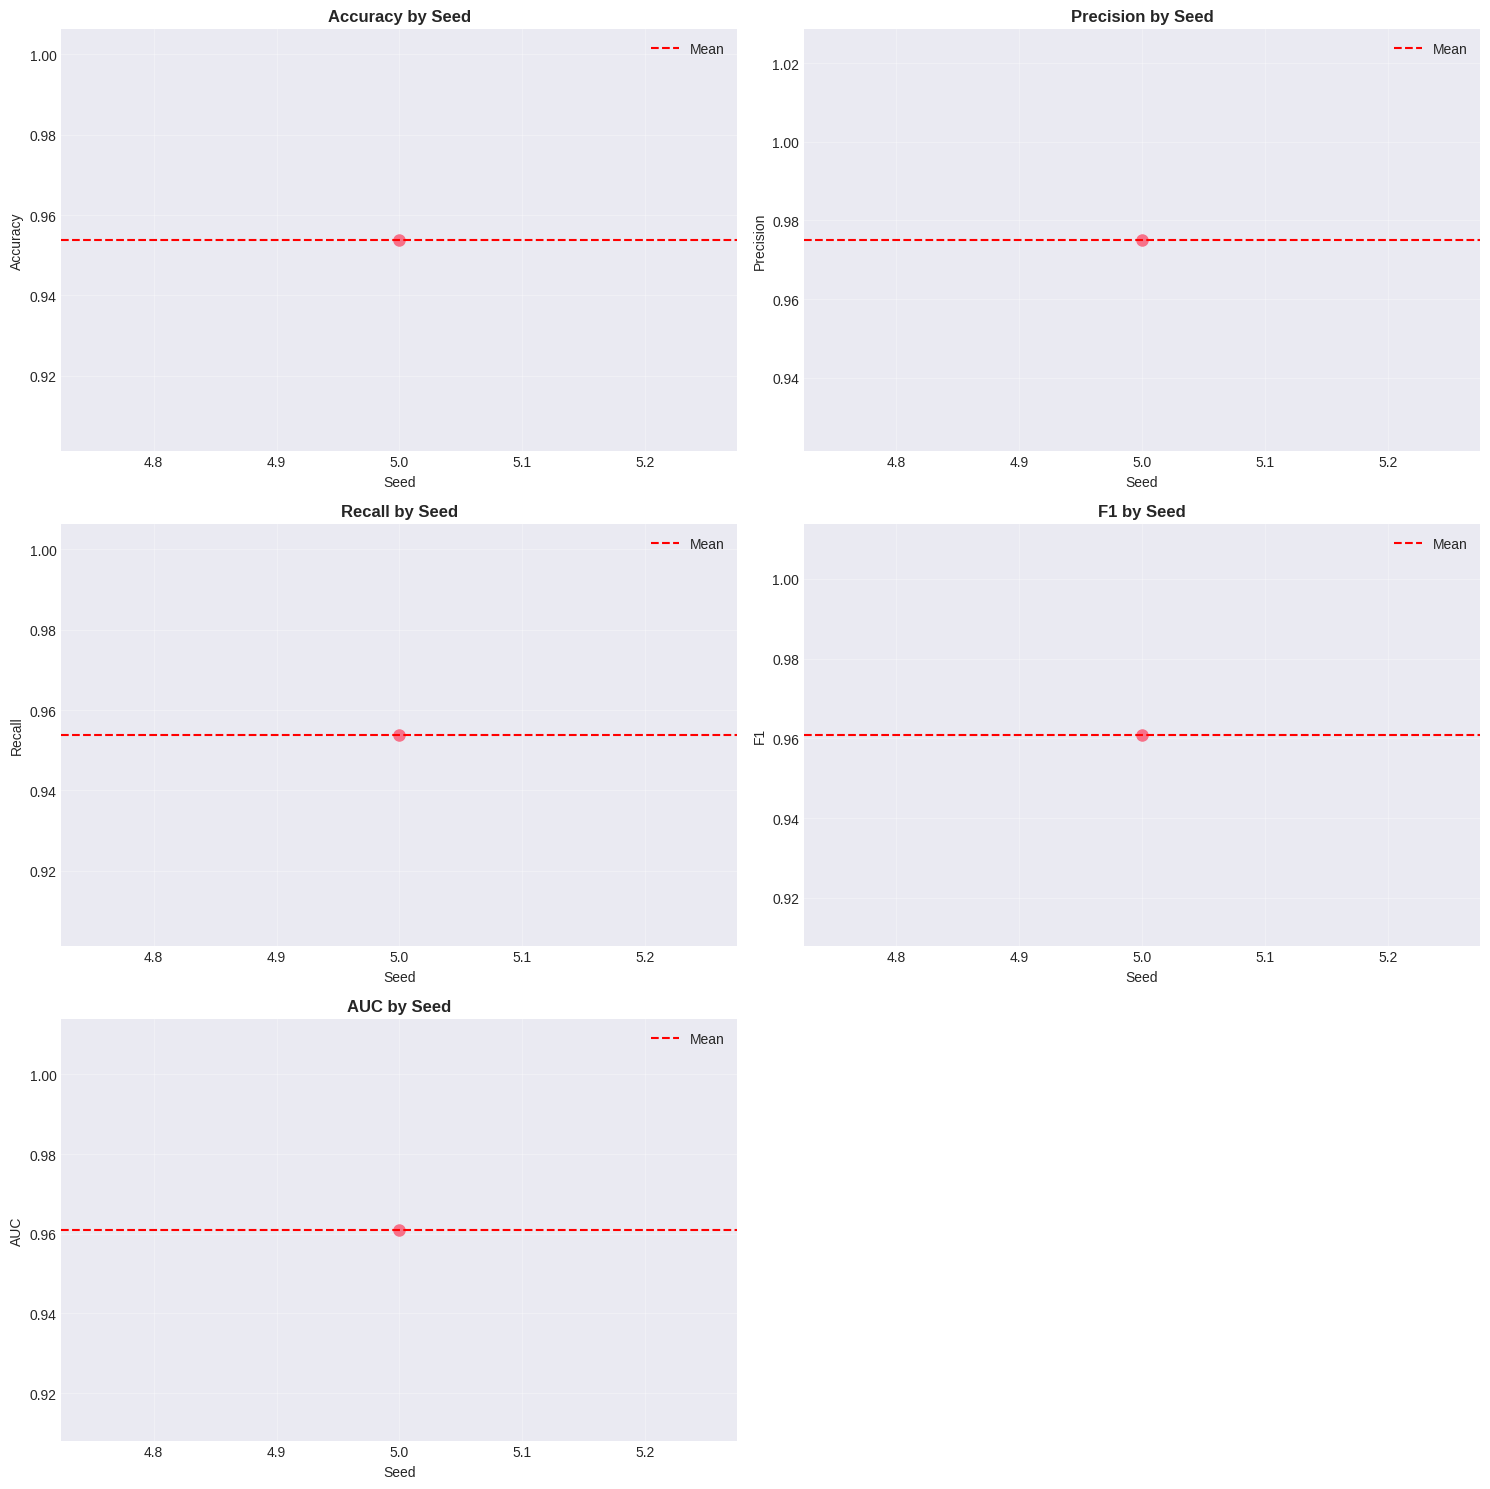

In [22]:
# Visualize performance by seed
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
if seed_performance['AUC'].notna().any():
    metrics_to_plot.append('AUC')

n_metrics = len(metrics_to_plot)
n_rows = (n_metrics + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes[0], axes[1]]

for idx, metric in enumerate(metrics_to_plot):
    if idx < len(axes):
        axes[idx].plot(seed_performance['seed'], seed_performance[metric], 
                            marker='o', linewidth=2, markersize=8)
        axes[idx].set_title(f'{metric} by Seed', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Seed')
        axes[idx].set_ylabel(metric)
        axes[idx].grid(alpha=0.3)
        axes[idx].axhline(y=seed_performance[metric].mean(), 
                               color='r', linestyle='--', label='Mean')
        axes[idx].legend()

# Hide unused subplots
for idx in range(len(metrics_to_plot), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 10. Error Analysis (Autoencoder Only)

In [23]:
# Find misclassified samples
df['is_correct_label_pred'] = df['label_true'] == df['label_pred']
df['is_correct_final_pred'] = df['label_true'] == df['final_pred']

# Samples where label_pred was wrong but final_pred is correct
improved_samples = df[(~df['is_correct_label_pred']) & (df['is_correct_final_pred'])]
print(f"\nSamples improved by LLM reasoning: {len(improved_samples)}")
print(f"Percentage: {len(improved_samples)/len(df)*100:.2f}%")

# Samples where label_pred was correct but final_pred is wrong
degraded_samples = df[(df['is_correct_label_pred']) & (~df['is_correct_final_pred'])]
print(f"\nSamples degraded by LLM reasoning: {len(degraded_samples)}")
print(f"Percentage: {len(degraded_samples)/len(df)*100:.2f}%")

# Both wrong
both_wrong = df[(~df['is_correct_label_pred']) & (~df['is_correct_final_pred'])]
print(f"\nSamples where both predictions are wrong: {len(both_wrong)}")
print(f"Percentage: {len(both_wrong)/len(df)*100:.2f}%")


Samples improved by LLM reasoning: 142
Percentage: 2.72%

Samples degraded by LLM reasoning: 1
Percentage: 0.02%

Samples where both predictions are wrong: 240
Percentage: 4.60%


In [24]:
# Show some examples of improved samples
if len(improved_samples) > 0:
    print("\nExamples of samples improved by LLM reasoning:")
    display_cols = ['seed', 'label_true', 'label_pred', 'final_pred', 'from']
    print(improved_samples[display_cols].head(10).to_string(index=False))


Examples of samples improved by LLM reasoning:
 seed  label_true  label_pred  final_pred                   from
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction
    5           0           1           0 autoencoder prediction


In [25]:
# Show some examples of degraded samples
if len(degraded_samples) > 0:
    print("\nExamples of samples degraded by LLM reasoning:")
    display_cols = ['seed', 'label_true', 'label_pred', 'final_pred', 'from']
    print(degraded_samples[display_cols].head(10).to_string(index=False))


Examples of samples degraded by LLM reasoning:
 seed  label_true  label_pred  final_pred                   from
    5           1           1           0 autoencoder prediction


## 11. LLM Reasoning Analysis (Autoencoder Only)

In [26]:
# Check if llm_reasoning column has data
print("\nLLM Reasoning Analysis:")
print(f"Total samples: {len(df)}")
print(f"Samples with LLM reasoning: {df['llm_reasoning'].notna().sum()}")
print(f"Samples without LLM reasoning: {df['llm_reasoning'].isna().sum()}")

# Show some examples
if df['llm_reasoning'].notna().sum() > 0:
    print("\nSample LLM Reasoning (first 3):")
    for idx, reasoning in enumerate(df[df['llm_reasoning'].notna()]['llm_reasoning'].head(3), 1):
        print(f"\n--- Example {idx} ---")
        print(str(reasoning)[:500] + "..." if len(str(reasoning)) > 500 else str(reasoning))


LLM Reasoning Analysis:
Total samples: 5217
Samples with LLM reasoning: 571
Samples without LLM reasoning: 4646

Sample LLM Reasoning (first 3):

--- Example 1 ---
The authentication path C4997 -> U6998 -> C4997 is **BENIGN**.

Here's a summary of the analysis:
*   **User U6998 Statistics**: U6998 logged into 60 unique computers. The top 10 computers U6998 logged into each had a login count of 1, indicating that U6998 accesses a wide variety of machines but not frequently the same ones.
*   **Computer C4997 Statistics**: C4997 was accessed by 36 unique users. The top 10 users, including U6998, each had a login count of 1, suggesting that C4997 is a commonl...

--- Example 2 ---
The authentication path C166 -> U0 -> C5978 is classified as **MALICIOUS**.

Here's the reasoning:

*   **User U0 Behavior:** User U0 has logged into an exceptionally high number of unique computers (12,522). This is a strong indicator of a compromised user account or a malicious actor performing reconnaissance

## 12. Embedding Analysis (Autoencoder Only)

In [27]:
# Note: Embedding column contains string representation of numpy arrays
# This is a simplified analysis - for detailed embedding analysis, you would need to parse the strings

print("\nEmbedding Information:")
print(f"Total samples with embeddings: {df['embedding'].notna().sum()}")
print(f"Sample embedding (first 100 chars): {str(df['embedding'].iloc[0])[:100]}...")


Embedding Information:
Total samples with embeddings: 5217
Sample embedding (first 100 chars): (np.float64(0.5093977377374577), np.float64(0.38205465319499265), np.float64(-0.12026139375715726), ...


## 13. Summary và Insights (Autoencoder Predictions Only)

In [28]:
print("=" * 80)
print("SUMMARY AND KEY INSIGHTS - AUTOENCODER PREDICTIONS ONLY")
print("=" * 80)

print(f"\n1. DATASET OVERVIEW")
print(f"   - Total samples (autoencoder only): {len(df):,}")
print(f"   - Number of seeds: {df['seed'].nunique()}")
print(f"   - Unique nodes: node_0={df['node_0'].nunique()}, node_1={df['node_1'].nunique()}, node_2={df['node_2'].nunique()}")

print(f"\n2. LABEL DISTRIBUTION")
print(f"   - Label 0 (Normal): {(df['label_true']==0).sum():,} ({(df['label_true']==0).sum()/len(df)*100:.2f}%)")
print(f"   - Label 1 (Anomaly): {(df['label_true']==1).sum():,} ({(df['label_true']==1).sum()/len(df)*100:.2f}%)")

print(f"\n3. MODEL PERFORMANCE (Label Pred - Autoencoder)")
print(f"   - Accuracy:  {accuracy_pred:.4f} ({accuracy_pred*100:.2f}%)")
print(f"   - Precision: {precision_pred:.4f}")
print(f"   - Recall:    {recall_pred:.4f}")
print(f"   - F1-Score:  {f1_pred:.4f}")
if auc_pred is not None:
    print(f"   - AUC Score: {auc_pred:.4f}")

print(f"\n4. MODEL PERFORMANCE (Final Pred with LLM - Autoencoder)")
print(f"   - Accuracy:  {accuracy_final:.4f} ({accuracy_final*100:.2f}%)")
print(f"   - Precision: {precision_final:.4f}")
print(f"   - Recall:    {recall_final:.4f}")
print(f"   - F1-Score:  {f1_final:.4f}")
if auc_final is not None:
    print(f"   - AUC Score: {auc_final:.4f}")

print(f"\n5. LLM IMPACT ON AUTOENCODER PREDICTIONS")
improvement = accuracy_final - accuracy_pred
improvement_pct = (improvement / accuracy_pred * 100) if accuracy_pred > 0 else 0
print(f"   - Accuracy improvement: {improvement:+.4f} ({improvement_pct:+.2f}%)")
if auc_pred is not None and auc_final is not None:
    auc_improvement = auc_final - auc_pred
    auc_improvement_pct = (auc_improvement / auc_pred * 100) if auc_pred > 0 else 0
    print(f"   - AUC improvement: {auc_improvement:+.4f} ({auc_improvement_pct:+.2f}%)")
print(f"   - Samples improved: {len(improved_samples):,} ({len(improved_samples)/len(df)*100:.2f}%)")
print(f"   - Samples degraded: {len(degraded_samples):,} ({len(degraded_samples)/len(df)*100:.2f}%)")
print(f"   - Net improvement: {len(improved_samples) - len(degraded_samples):+,}")

print(f"\n6. DATA SOURCE VERIFICATION")
for source in df['from'].unique():
    count = (df['from'] == source).sum()
    pct = count / len(df) * 100
    print(f"   - {source}: {count:,} ({pct:.2f}%)")

print(f"\n7. LLM REASONING COVERAGE")
print(f"   - Samples with LLM reasoning: {df['llm_reasoning'].notna().sum():,} ({df['llm_reasoning'].notna().sum()/len(df)*100:.2f}%)")
print(f"   - Samples without LLM reasoning: {df['llm_reasoning'].isna().sum():,} ({df['llm_reasoning'].isna().sum()/len(df)*100:.2f}%)")

print(f"\n8. SEED-WISE PERFORMANCE")
print(f"   - Average Accuracy across seeds: {seed_performance['Accuracy'].mean():.4f}")
print(f"   - Std Accuracy across seeds: {seed_performance['Accuracy'].std():.4f}")
if seed_performance['AUC'].notna().any():
    print(f"   - Average AUC across seeds: {seed_performance['AUC'].mean():.4f}")
    print(f"   - Std AUC across seeds: {seed_performance['AUC'].std():.4f}")

print("\n" + "=" * 80)

SUMMARY AND KEY INSIGHTS - AUTOENCODER PREDICTIONS ONLY

1. DATASET OVERVIEW
   - Total samples (autoencoder only): 5,217
   - Number of seeds: 1
   - Unique nodes: node_0=2650, node_1=3261, node_2=910

2. LABEL DISTRIBUTION
   - Label 0 (Normal): 5,000 (95.84%)
   - Label 1 (Anomaly): 217 (4.16%)

3. MODEL PERFORMANCE (Label Pred - Autoencoder)
   - Accuracy:  0.9268 (92.68%)
   - Precision: 0.9703
   - Recall:    0.9268
   - F1-Score:  0.9419
   - AUC Score: 0.9609

4. MODEL PERFORMANCE (Final Pred with LLM - Autoencoder)
   - Accuracy:  0.9538 (95.38%)
   - Precision: 0.9750
   - Recall:    0.9538
   - F1-Score:  0.9609
   - AUC Score: 0.9609

5. LLM IMPACT ON AUTOENCODER PREDICTIONS
   - Accuracy improvement: +0.0270 (+2.92%)
   - AUC improvement: +0.0000 (+0.00%)
   - Samples improved: 142 (2.72%)
   - Samples degraded: 1 (0.02%)
   - Net improvement: +141

6. DATA SOURCE VERIFICATION
   - autoencoder prediction: 5,217 (100.00%)

7. LLM REASONING COVERAGE
   - Samples with LLM rea

## 14. Export Results

In [29]:
# Save metrics comparison
metrics_comparison.to_csv(f'metrics_comparison_autoencoder.csv', index=False)
print(f"Metrics comparison saved to metrics_comparison_autoencoder.csv")

# Save seed performance
seed_performance.to_csv(f'seed_performance_autoencoder.csv', index=False)
print(f"Seed performance saved to seed_performance_autoencoder.csv")

# Save improved samples
if len(improved_samples) > 0:
    improved_samples.to_csv(f'improved_samples_autoencoder.csv', index=False)
    print(f"Improved samples saved to improved_samples_autoencoder.csv")

# Save degraded samples
if len(degraded_samples) > 0:
    degraded_samples.to_csv(f'degraded_samples_autoencoder.csv', index=False)
    print(f"Degraded samples saved to degraded_samples_autoencoder.csv")

print("\nAll analysis results for autoencoder predictions exported successfully!")

Metrics comparison saved to metrics_comparison_autoencoder.csv
Seed performance saved to seed_performance_autoencoder.csv
Improved samples saved to improved_samples_autoencoder.csv
Degraded samples saved to degraded_samples_autoencoder.csv

All analysis results for autoencoder predictions exported successfully!


## Conclusion

Notebook này đã thực hiện phân tích toàn diện cho **autoencoder predictions only**, bao gồm:
- Tổng quan về dataset và phân phối labels (chỉ autoencoder)
- Đánh giá hiệu suất của model (label_pred và final_pred cho autoencoder)
- So sánh hiệu quả của LLM reasoning trên autoencoder predictions
- Phân tích theo seed và node (autoencoder only)
- Phân tích lỗi và samples được cải thiện/giảm hiệu suất
- Export kết quả phân tích với suffix "_autoencoder"

**Lưu ý**: Tất cả phân tích trong notebook này chỉ áp dụng cho samples có `from == 'autoencoder prediction'`.

Các file CSV đã được export vào thư mục output với tên có suffix "_autoencoder" để phân biệt với phân tích tổng thể.